# Blue Bank Loan Analysis

Blue Bank is a bank in USA that has a loan department which is currently understaffed. They supply loans to individuals and don’t have much reporting on how risky these borrowers are. Using Python and Tableau, they’d like to see a report of borrowers who may have issues paying back the loan.

Date File: (loan_data_json.json) – 761 KB file
https://finch-groundhog-9245.squarespace.com/s/loan_data_json.json

Logo: (Blue Bank Logo.png)
https://finch-groundhog-9245.squarespace.com/s/Blue-Bank-Logo.png

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data/loan_data_json.json') as json_file:
    data = json.load(json_file)

In [3]:
loandata = pd.DataFrame(data)

In [4]:
loandata.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Look at unique values

In [5]:
loandata['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

Describe some of the data

In [6]:
loandata.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Describe data for specific values

In [7]:
loandata['int.rate'].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

In [8]:
loandata['dti'].describe()

count    9578.000000
mean       12.606679
std         6.883970
min         0.000000
25%         7.212500
50%        12.665000
75%        17.950000
max        29.960000
Name: dti, dtype: float64

In [9]:
loandata['fico'].describe()

count    9578.000000
mean      710.846314
std        37.970537
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       827.000000
Name: fico, dtype: float64

Get annual income

In [10]:
loandata['annualincome'] = np.exp(loandata['log.annual.inc'])

Categroize credit score

In [11]:
binInterval = [300, 400, 600, 660, 700, float('inf')]
binLabels   = ['very poor', 'poor', 'fair', 'good', 'excellent']
loandata['fico.cat'] = pd.cut(loandata['fico'], bins = binInterval, labels=binLabels)

In [12]:
loandata[['fico','fico.cat']]

,fico,fico.cat
0,737,excellent
1,707,excellent
2,682,good
3,712,excellent
4,667,good
...,...,...
9573,672,good
9574,722,excellent
9575,687,good
9576,692,good


For intrest rate, new column is wanted

In [13]:
loandata.loc[loandata['int.rate'] > .12, 'int.rate.type'] = 'high'
loandata.loc[loandata['int.rate'] <= .12, 'int.rate.type'] = 'low'


Number of loans/rows by fico.category and purpose

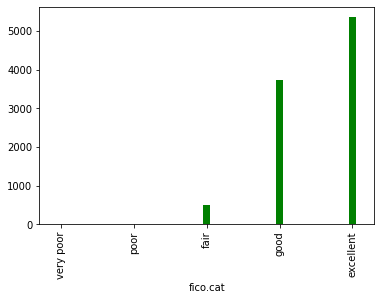

In [14]:
catplot = loandata.groupby('fico.cat').size()
catplot.plot.bar(color='green', width=.1)
plt.show()

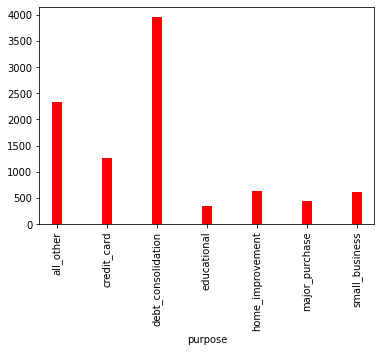

In [15]:
purposecount = loandata.groupby('purpose').size()
purposecount.plot.bar(color='red', width=.2)
plt.show()

Scatter plot

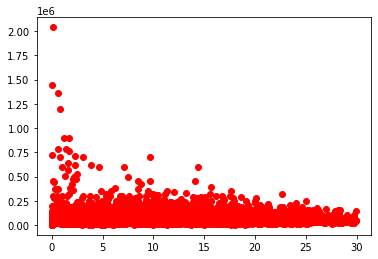

In [16]:
ypoint = loandata["annualincome"]
xpoint = loandata['dti']
plt.scatter(xpoint, ypoint, color='red')
plt.show()

Export

In [17]:
loandata.to_csv('data/loan_cleaned.csv', index=True)